# 房价预测数据集探索

- house_id: 房屋ID（整数）

- date: 日期（字符串）
- location: 位置（字符串）
- type: 房屋类型（字符串）
- block: 建筑单元（字符串）
- street: 街道（字符串）
- storey_range: 楼层范围（字符串）
- flat_model: 房屋模型（字符串）

- area_sqm: 面积（平方米，浮点数）
- commence_date: 开工日期（整数）
- price: 价格（浮点数）

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [164]:
train_df = pd.read_csv(r'./datasets/train.csv')

## 基础查看数据

In [165]:
# 查看数据类型
print(train_df.shape)
print("------------------")
print([train_df.info()])
print("------------------")
# 选择并打印所有数值型列
numeric_columns = train_df.select_dtypes(include=[np.number])
print(numeric_columns.columns)

(271721, 11)
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   house_id       271721 non-null  int64  
 1   date           271721 non-null  object 
 2   location       271721 non-null  object 
 3   type           271721 non-null  object 
 4   block          271721 non-null  object 
 5   street         271721 non-null  object 
 6   storey_range   271721 non-null  object 
 7   area_sqm       271721 non-null  float64
 8   flat_model     271721 non-null  object 
 9   commence_date  271721 non-null  int64  
 10  price          271721 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 22.8+ MB
[None]
------------------
Index(['house_id', 'area_sqm', 'commence_date', 'price'], dtype='object')


In [166]:
train_df

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,199577,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,217021,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,308062,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,212465,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,60654,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,28297,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,321995,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,308162,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


In [167]:
# 查看缺失值
[train_df.isnull().sum()]

[house_id         0
 date             0
 location         0
 type             0
 block            0
 street           0
 storey_range     0
 area_sqm         0
 flat_model       0
 commence_date    0
 price            0
 dtype: int64]

In [168]:
# 查看基础统计描述
train_df.describe()

,house_id,area_sqm,commence_date,price
count,271721.000000,271721.000000,271721.000000,271721.000000
mean,169785.994870,96.544832,1987.982942,281197.589537
std,98022.533902,25.587877,9.125141,112160.993184
min,1.000000,28.000000,1966.000000,28000.000000
25%,85021.000000,73.000000,1981.000000,195000.000000
50%,169739.000000,99.000000,1987.000000,263000.000000
75%,254609.000000,115.000000,1997.000000,350000.000000
max,339651.000000,280.000000,2010.000000,903000.000000


In [169]:
# 查看空值
train_df.isnull().sum()

house_id         0
date             0
location         0
type             0
block            0
street           0
storey_range     0
area_sqm         0
flat_model       0
commence_date    0
price            0
dtype: int64

## 数值类型数据，查看单列的分布、异常

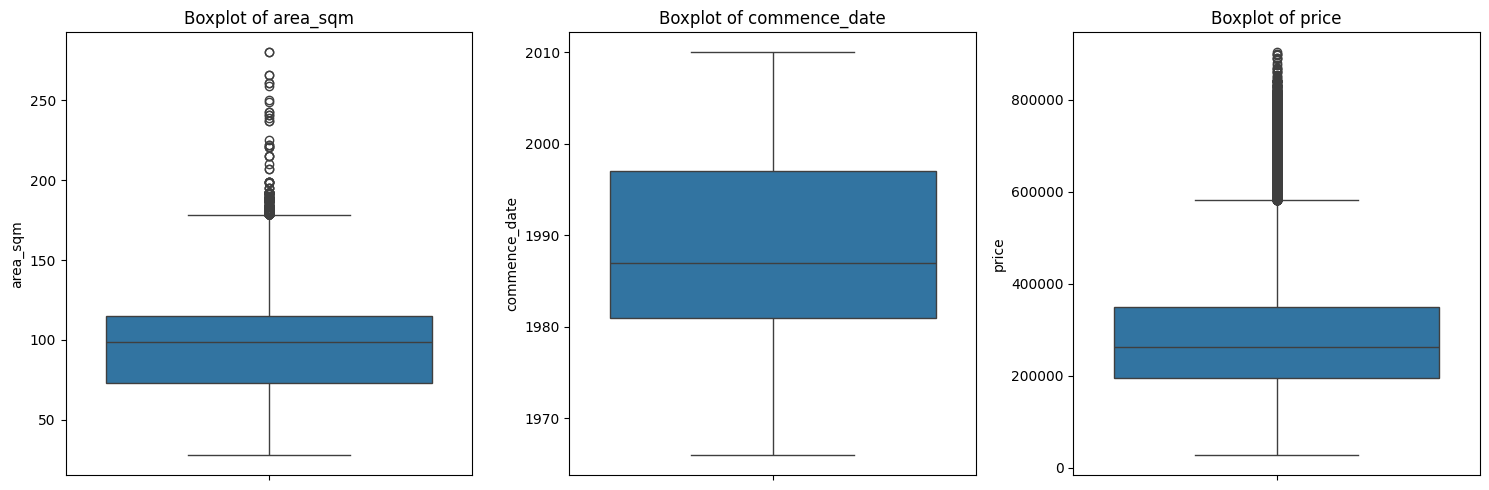

In [170]:
# 先探索数值类型特征：area_sqm,commence_date,price
# 设置可视化的布局大小
plt.figure(figsize=(15, 5))

# 为 train_df 中的每个数值型字段绘制箱线图
for i, column in enumerate(['area_sqm', 'commence_date', 'price'], 1):
    plt.subplot(1, 3, i)  # 创建子图
    sns.boxplot(data=train_df, y=column)  # 使用Seaborn绘制箱线图
    plt.title(f'Boxplot of {column}')  # 设置图的标题

plt.tight_layout()  # 调整布局
plt.show()  # 显示图表

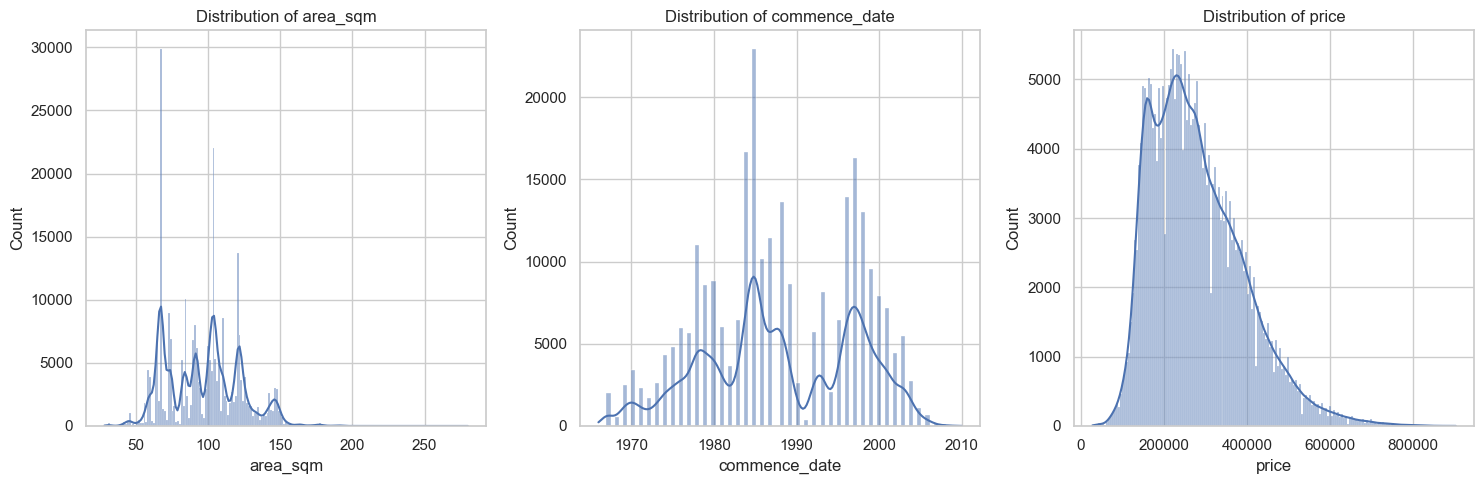

In [182]:
# 特征分布情况
# 设置可视化的布局大小
plt.figure(figsize=(15, 5))

# 为 train_df 中的每个数值型字段绘制直方图
for i, column in enumerate(['area_sqm', 'commence_date', 'price'], 1):
    plt.subplot(1, 3, i)  # 创建子图
    sns.histplot(train_df[column], kde=True)  # 使用Seaborn绘制直方图和核密度估计
    plt.title(f'Distribution of {column}')  # 设置图的标题

plt.tight_layout()  # 调整布局
plt.show()  # 显示图表

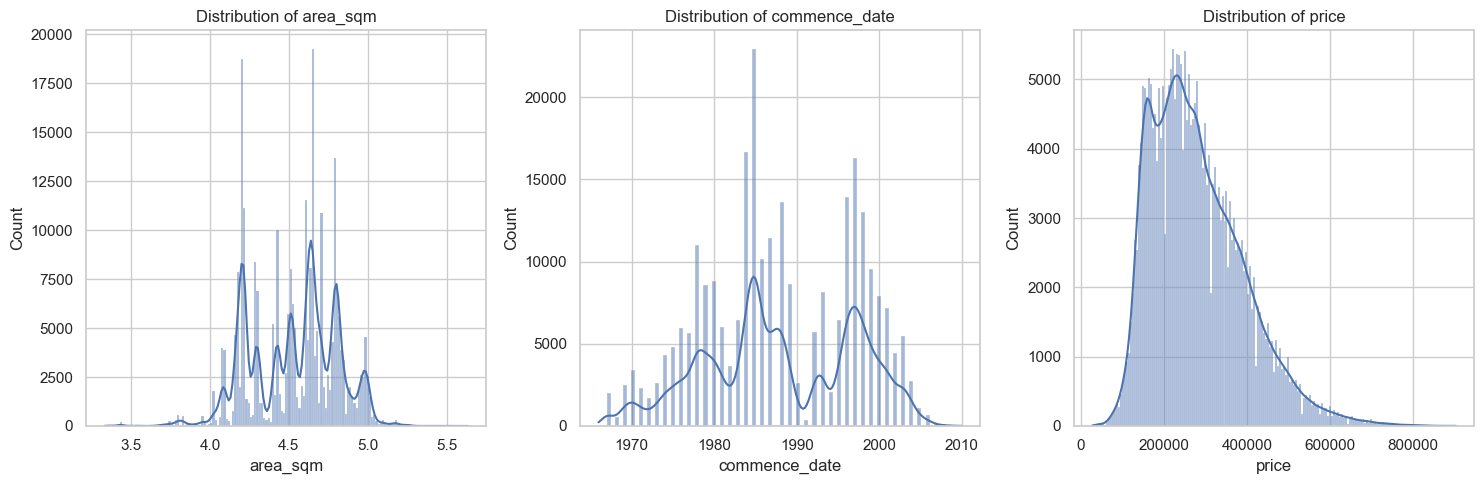

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置可视化的布局大小
plt.figure(figsize=(15, 5))

# 为 train_df 中的每个数值型字段绘制直方图
for i, column in enumerate(['area_sqm', 'commence_date', 'price'], 1):
    plt.subplot(1, 3, i)  # 创建子图
    # 对 'area_sqm' 应用对数变换，其他列保持原样
    if column == 'area_sqm':
        sns.histplot(np.log(train_df[column]), kde=True)  # 对 'area_sqm' 应用对数变换，避免长尾部分
    else:
        sns.histplot(train_df[column], kde=True)  # 其他列不变
    plt.title(f'Distribution of {column}')  # 设置图的标题

plt.tight_layout()  # 调整布局
plt.show()  # 显示图表

## 数值类型数据，查看单列与目标列的关系

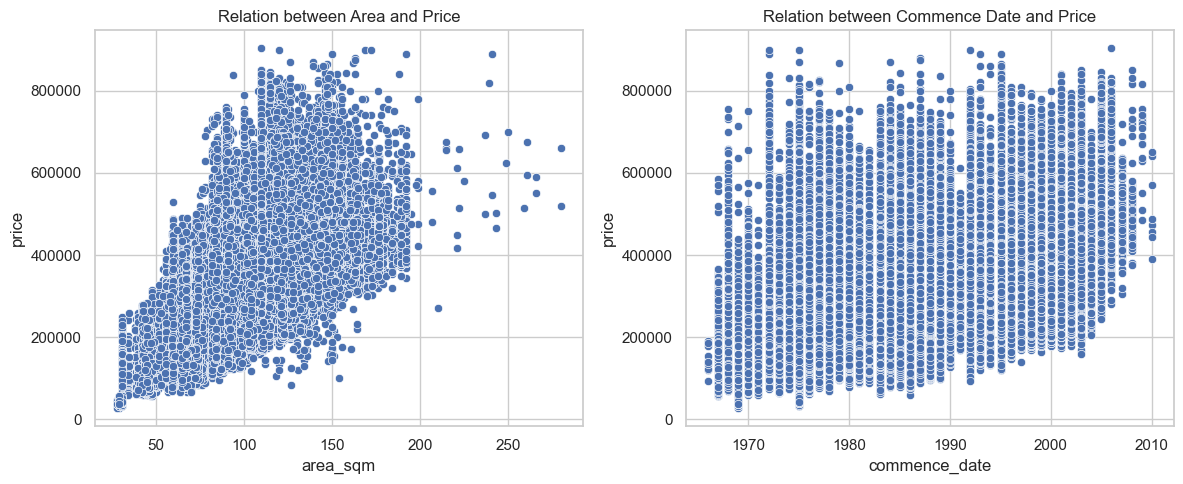

In [190]:
### 查看数值特征和目标特征的关系

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个 1x2 的图表布局
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 第一个图：area_sqm 与 price 的关系
sns.scatterplot(x='area_sqm', y='price', data=train_df, ax=ax[0])
ax[0].set_title('Relation between Area and Price')

# 第二个图：commence_date 与 price 的关系
sns.scatterplot(x='commence_date', y='price', data=train_df, ax=ax[1])
ax[1].set_title('Relation between Commence Date and Price')

# 显示图表
plt.tight_layout()
plt.show()

# 可以看出来：两者都具备正相关性

In [196]:
# preprocess data to make it understandable to computer
# look at possible values for each column
print('type', train_df['type'].unique())  # one hot encoding
print('storey_range', train_df['storey_range'].unique())  # label encoding
print('flat_model', train_df['flat_model'].unique())  # one hot encoding
print('location', train_df['location'].unique())  # one hot encoding
print(len(train_df['street'].unique()))

type ['5 ROOM' '3 ROOM' '4 ROOM' 'EXECUTIVE' '2 ROOM' '1 ROOM'
 'MULTI-GENERATION']
storey_range ['07 TO 09' '10 TO 12' '04 TO 06' '01 TO 03' '16 TO 18' '19 TO 21'
 '13 TO 15' '22 TO 24' '25 TO 27' '31 TO 33' '28 TO 30' '37 TO 39'
 '34 TO 36' '40 TO 42']
flat_model ['D' 'N' 'K' 'G' 'O' 'L' 'I' 'F' 'C' 'H' 'P' 'B' 'J' 'M' 'E' 'A']
location ['Raleigh' 'Fresno' 'Tucson' 'Austin' 'Honolulu' 'Riverside' 'Omaha'
 'Washington' 'Albuquerque' 'Chicago' 'Tampa' 'Milwaukee' 'Arlington'
 'Pittsburgh' 'Boston' 'Sacramento' 'Seatle' 'Miami' 'Minneapolis'
 'Cleveland' 'Denver' 'Mesa' 'Oakland' 'Atlanta' 'Portland' 'Baltimore']
522


In [197]:
# 确保'date'列是日期格式
train_df['date'] = pd.to_datetime(train_df['date'])

# 从'date'列提取年份
train_df['year'] = train_df['date'].dt.year

# 计算建造时间
train_df['building_age'] = train_df['year'] - train_df['commence_date']

# 现在 train_df 包含了一个新的列 'building_age'，表示建造时间

In [198]:
train_df

,house_id,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price,year,building_age
0,199577,2006-09-01,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0,2006,3
1,217021,2007-06-01,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0,2007,19
2,308062,2010-09-01,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0,2010,34
3,212465,2007-04-01,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0,2007,30
4,60654,2001-10-01,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0,2001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,101563,2003-01-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0,2003,14
271717,28297,2000-11-01,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0,2000,4
271718,321995,2011-04-01,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0,2011,7
271719,308162,2010-09-01,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0,2010,11


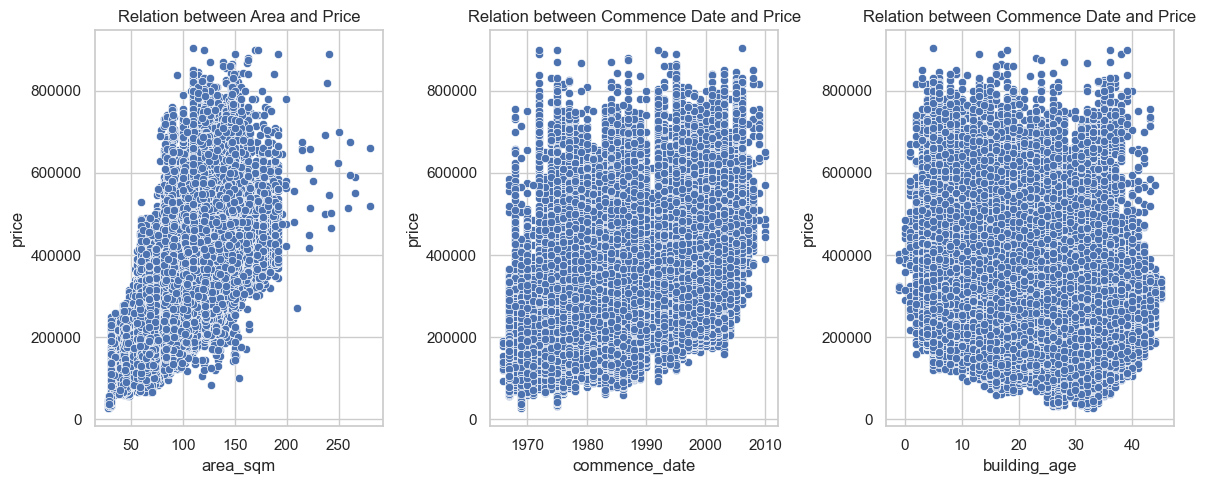

In [199]:
### 查看数值特征和目标特征的关系

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个 1x2 的图表布局
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# 第一个图：area_sqm 与 price 的关系
sns.scatterplot(x='area_sqm', y='price', data=train_df, ax=ax[0])
ax[0].set_title('Relation between Area and Price')

# 第二个图：commence_date 与 price 的关系
sns.scatterplot(x='commence_date', y='price', data=train_df, ax=ax[1])
ax[1].set_title('Relation between Commence Date and Price')

# 第二个图：commence_date 与 price 的关系
sns.scatterplot(x='building_age', y='price', data=train_df, ax=ax[2])
ax[2].set_title('Relation between Commence Date and Price')


# 显示图表
plt.tight_layout()
plt.show()

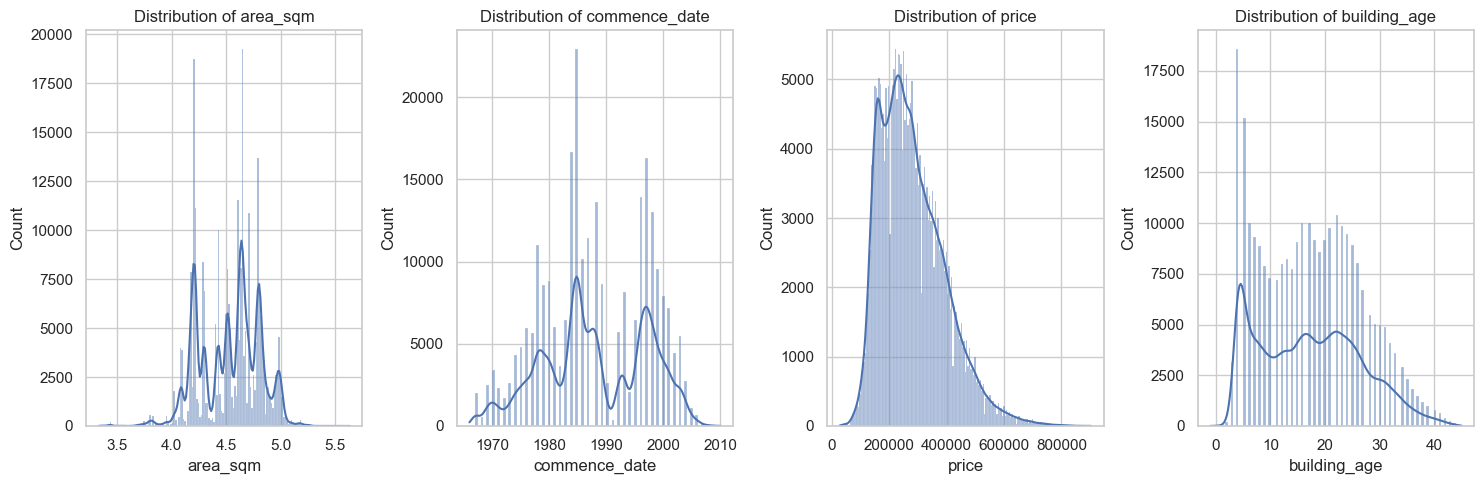

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置可视化的布局大小
plt.figure(figsize=(15, 5))

# 为 train_df 中的每个数值型字段绘制直方图
for i, column in enumerate(['area_sqm', 'commence_date', 'price', 'building_age'], 1):
    plt.subplot(1, 4, i)  # 创建子图
    # 对 'area_sqm' 应用对数变换，其他列保持原样
    if column == 'area_sqm':
        sns.histplot(np.log(train_df[column]), kde=True)  # 对 'area_sqm' 应用对数变换，避免长尾部分
    else:
        sns.histplot(train_df[column], kde=True)  # 其他列不变
    plt.title(f'Distribution of {column}')  # 设置图的标题

plt.tight_layout()  # 调整布局
plt.show()  # 显示图表

In [206]:
# 选择特征和目标变量
X = train_df[['area_sqm', 'commence_date', 'building_age']]
y = train_df['price']

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 4088470923.4718723
Root Mean Squared Error: 63941.15203428753
